In [1]:
!pip install diagrams

     |████████████████████████████████| 23.8 MB 1.7 MB/s 
     |████████████████████████████████| 46 kB 825 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


https://towardsdatascience.com/create-beautiful-architecture-diagrams-with-python-7792a1485f97

https://diagrams.mingrammer.com/

## AWS arch

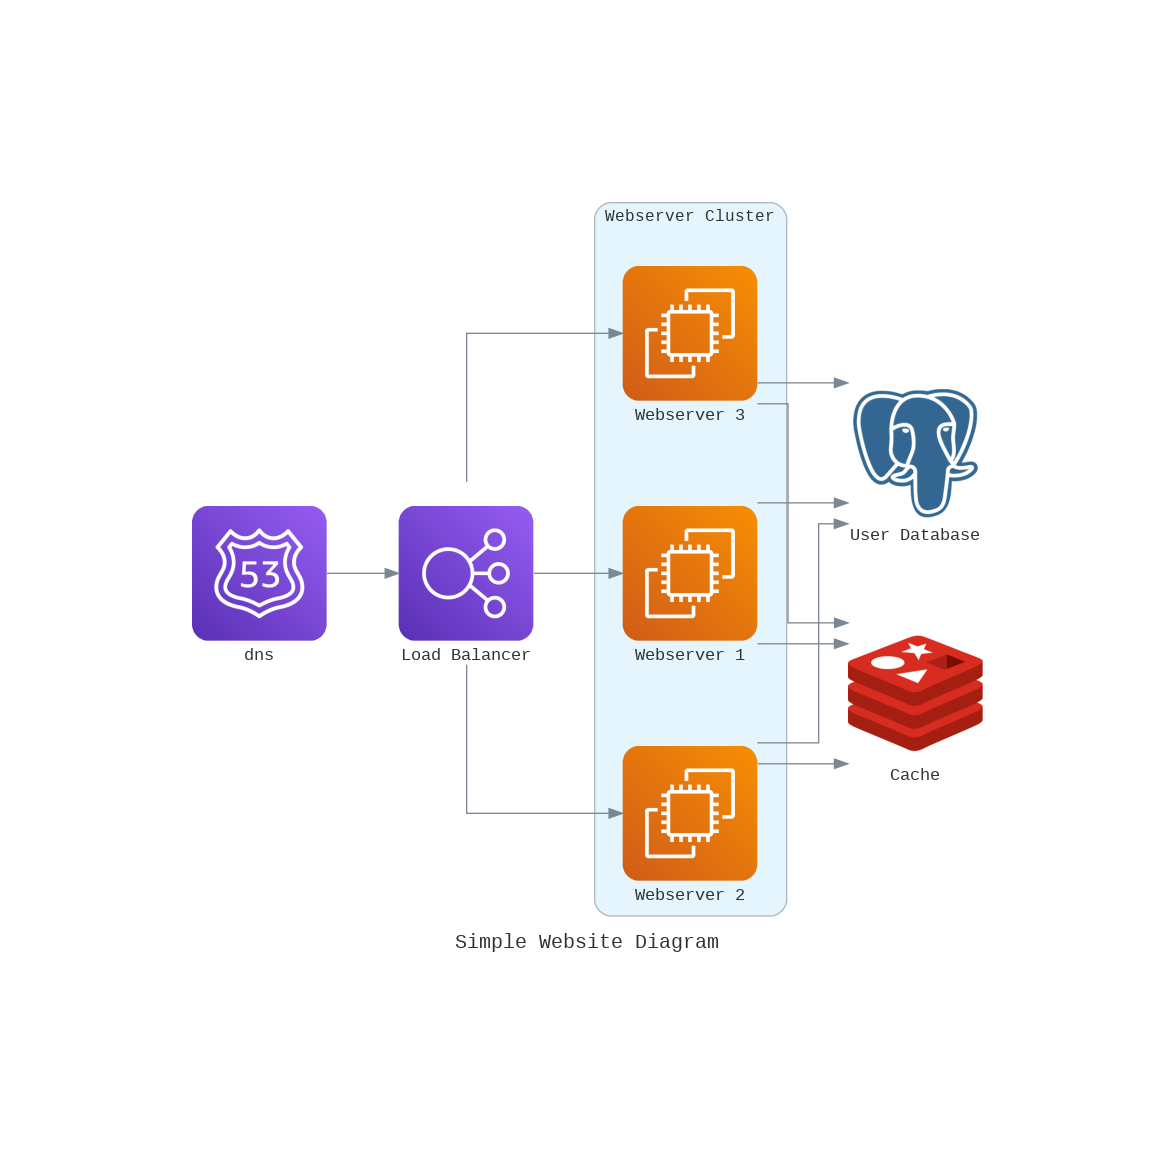

In [3]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.network import ELB, Route53
from diagrams.onprem.database import PostgreSQL # Would typically use RDS from aws.database
from diagrams.onprem.inmemory import Redis # Would typically use ElastiCache from aws.database

with Diagram("Simple Website Diagram", direction='LR') as diag: # It's LR by default, but you have a few options with the orientation
    dns = Route53("dns")
    load_balancer = ELB("Load Balancer")
    database = PostgreSQL("User Database")
    cache = Redis("Cache")
    with Cluster("Webserver Cluster"):
        svc_group = [EC2("Webserver 1"),
                    EC2("Webserver 2"),
                    EC2("Webserver 3")]
    dns >> load_balancer >> svc_group
    svc_group >> cache
    svc_group >> database
diag

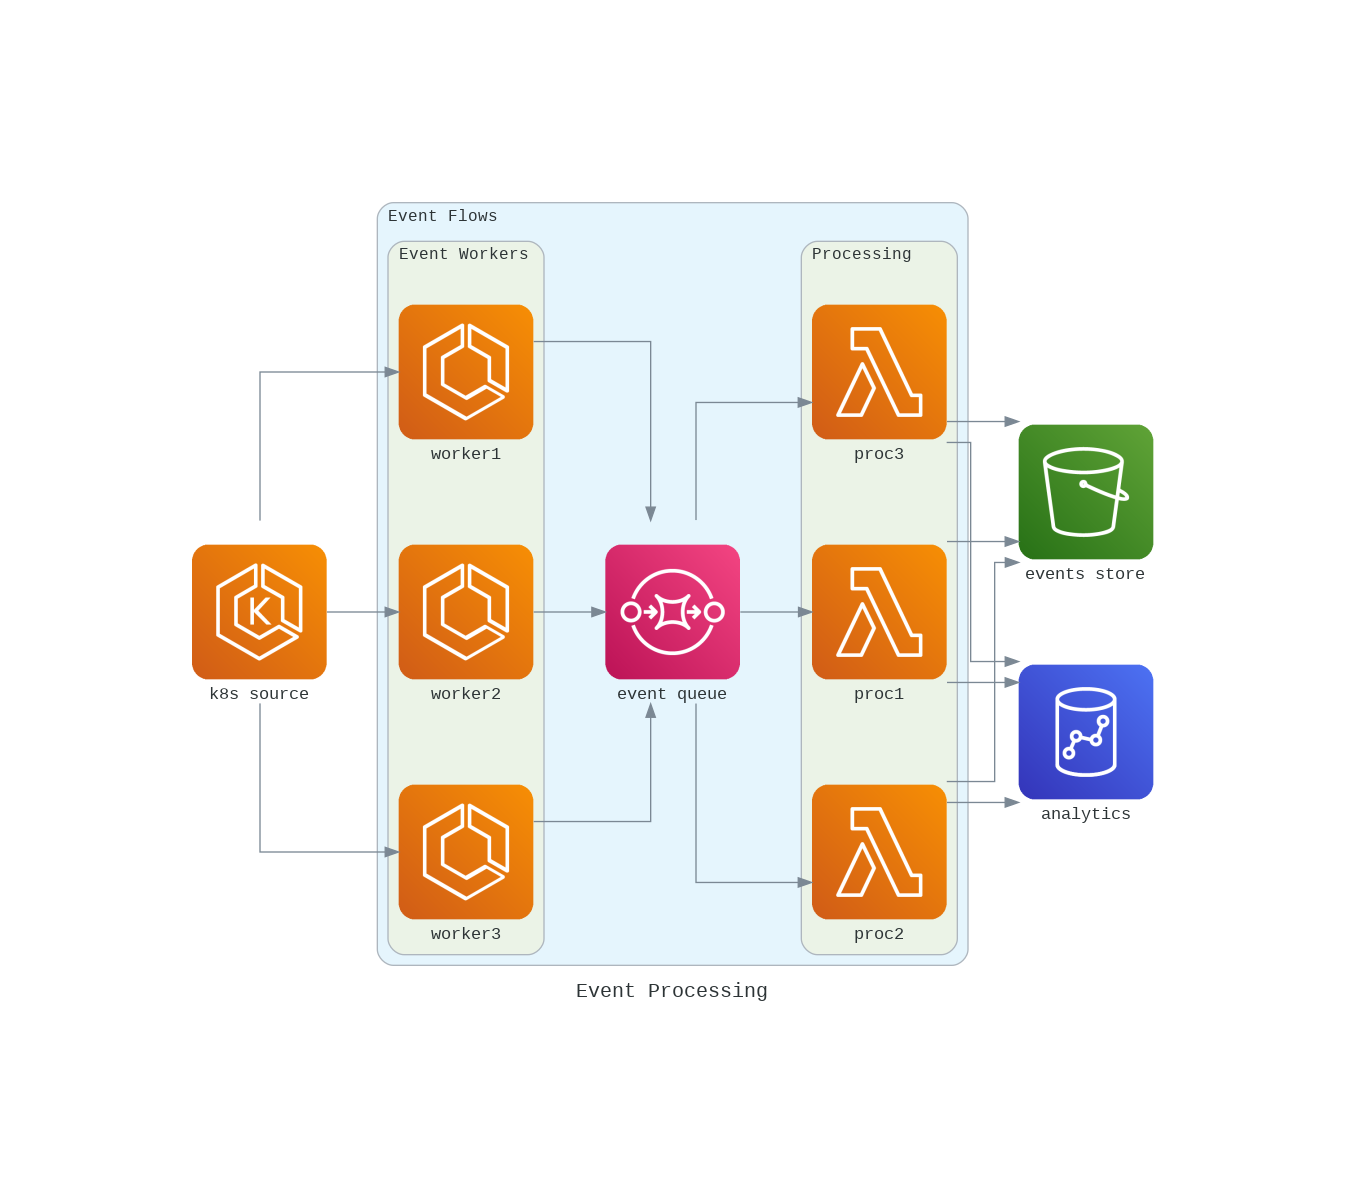

In [8]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, EKS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

with Diagram("Event Processing", show=False) as event_processing:
    source = EKS("k8s source")

    with Cluster("Event Flows"):
        with Cluster("Event Workers"):
            workers = [ECS("worker1"),
                       ECS("worker2"),
                       ECS("worker3")]

        queue = SQS("event queue")

        with Cluster("Processing"):
            handlers = [Lambda("proc1"),
                        Lambda("proc2"),
                        Lambda("proc3")]

    store = S3("events store")
    dw = Redshift("analytics")

    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw

event_processing

## GCP Arch

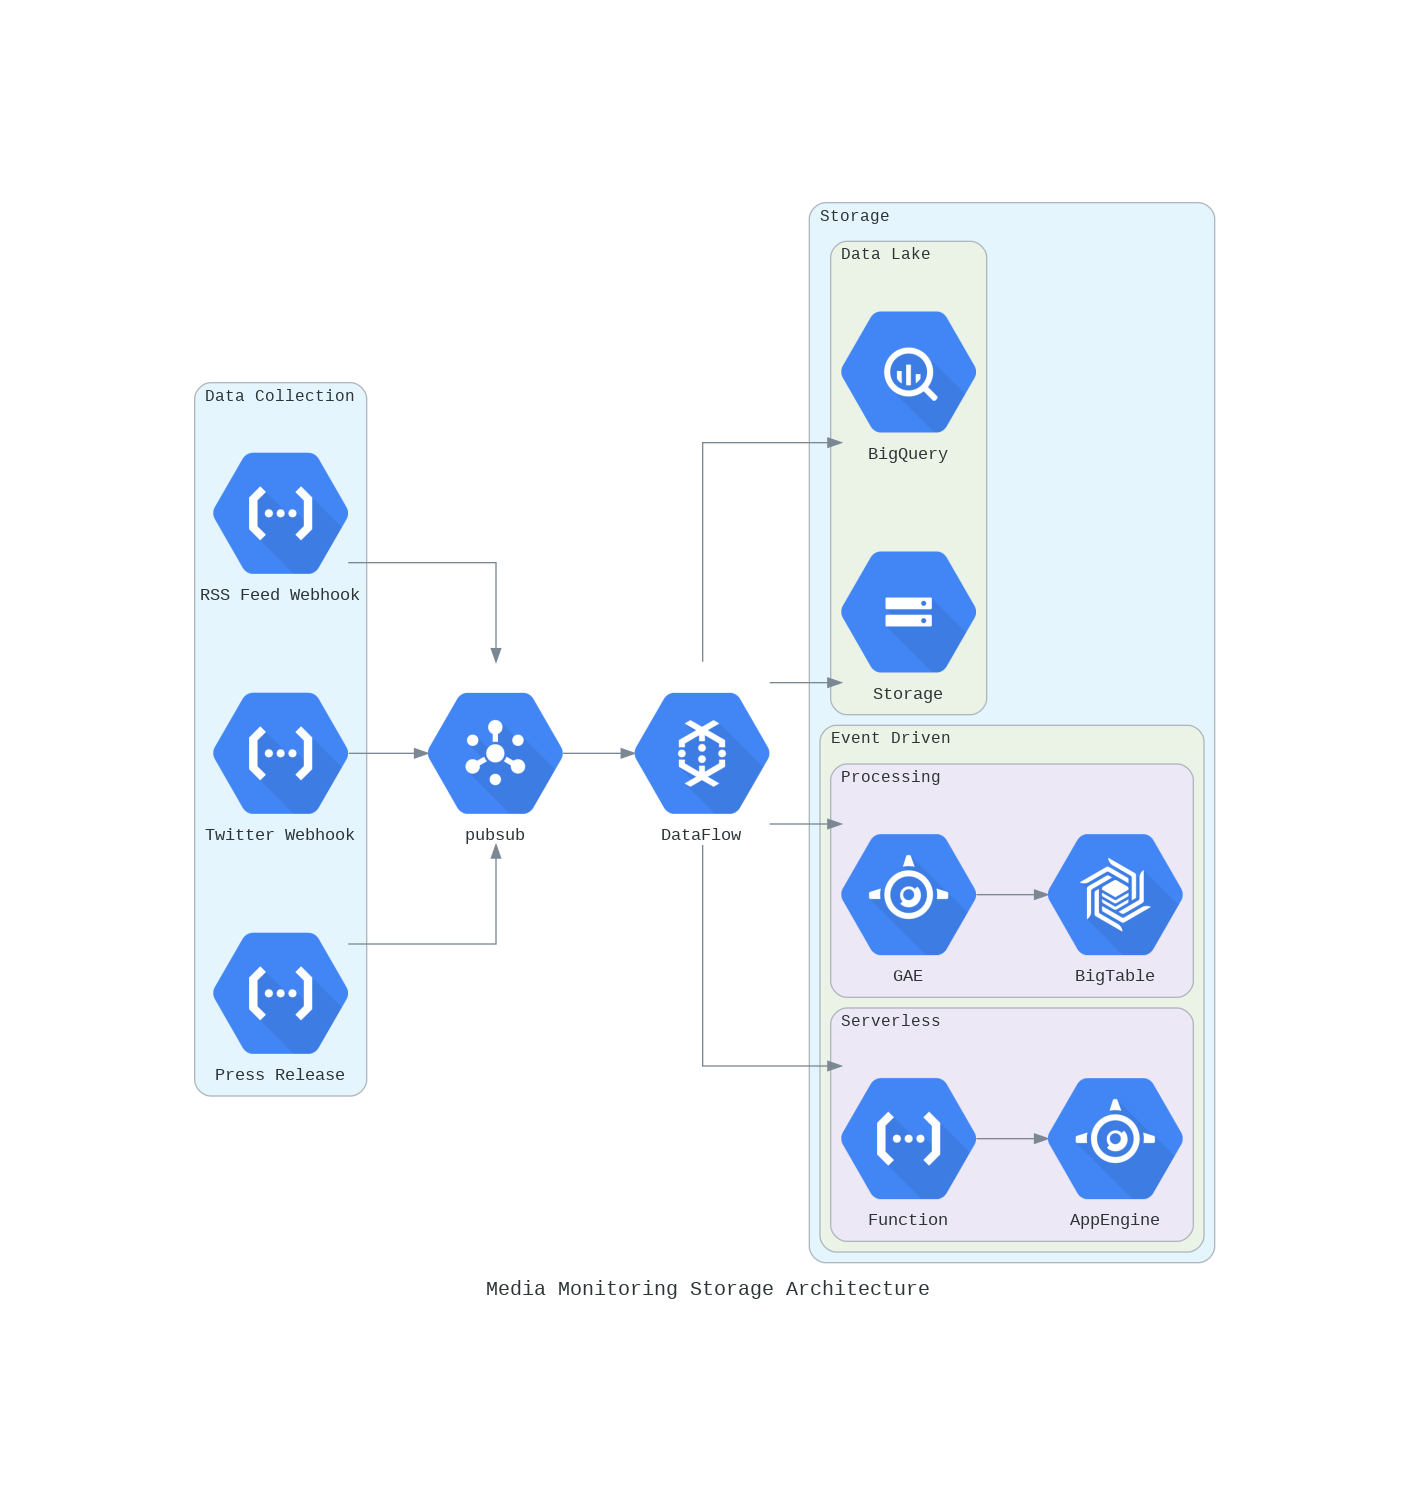

In [6]:
from diagrams import Cluster, Diagram
from diagrams.gcp.analytics import BigQuery, Dataflow, PubSub
from diagrams.gcp.compute import AppEngine, Functions
from diagrams.gcp.database import BigTable
from diagrams.gcp.iot import IotCore
from diagrams.gcp.storage import GCS

with Diagram("Media Monitoring Storage Architecture", show=False) as med_diag:
    pubsub = PubSub("pubsub")
    flow = Dataflow("DataFlow")

    with Cluster("Data Collection"):
        [Functions("RSS Feed Webhook"),
         Functions("Twitter Webhook"),
         Functions("Press Release")] >> pubsub >> flow

    with Cluster("Storage"):
        with Cluster("Data Lake"):
            flow >> [BigQuery("BigQuery"),
                     GCS("Storage")]

        with Cluster("Event Driven"):
            with Cluster("Processing"):
                flow >> AppEngine("GAE") >> BigTable("BigTable")

            with Cluster("Serverless"):
                flow >> Functions("Function") >> AppEngine("AppEngine")

    # pubsub >> flow
med_diag

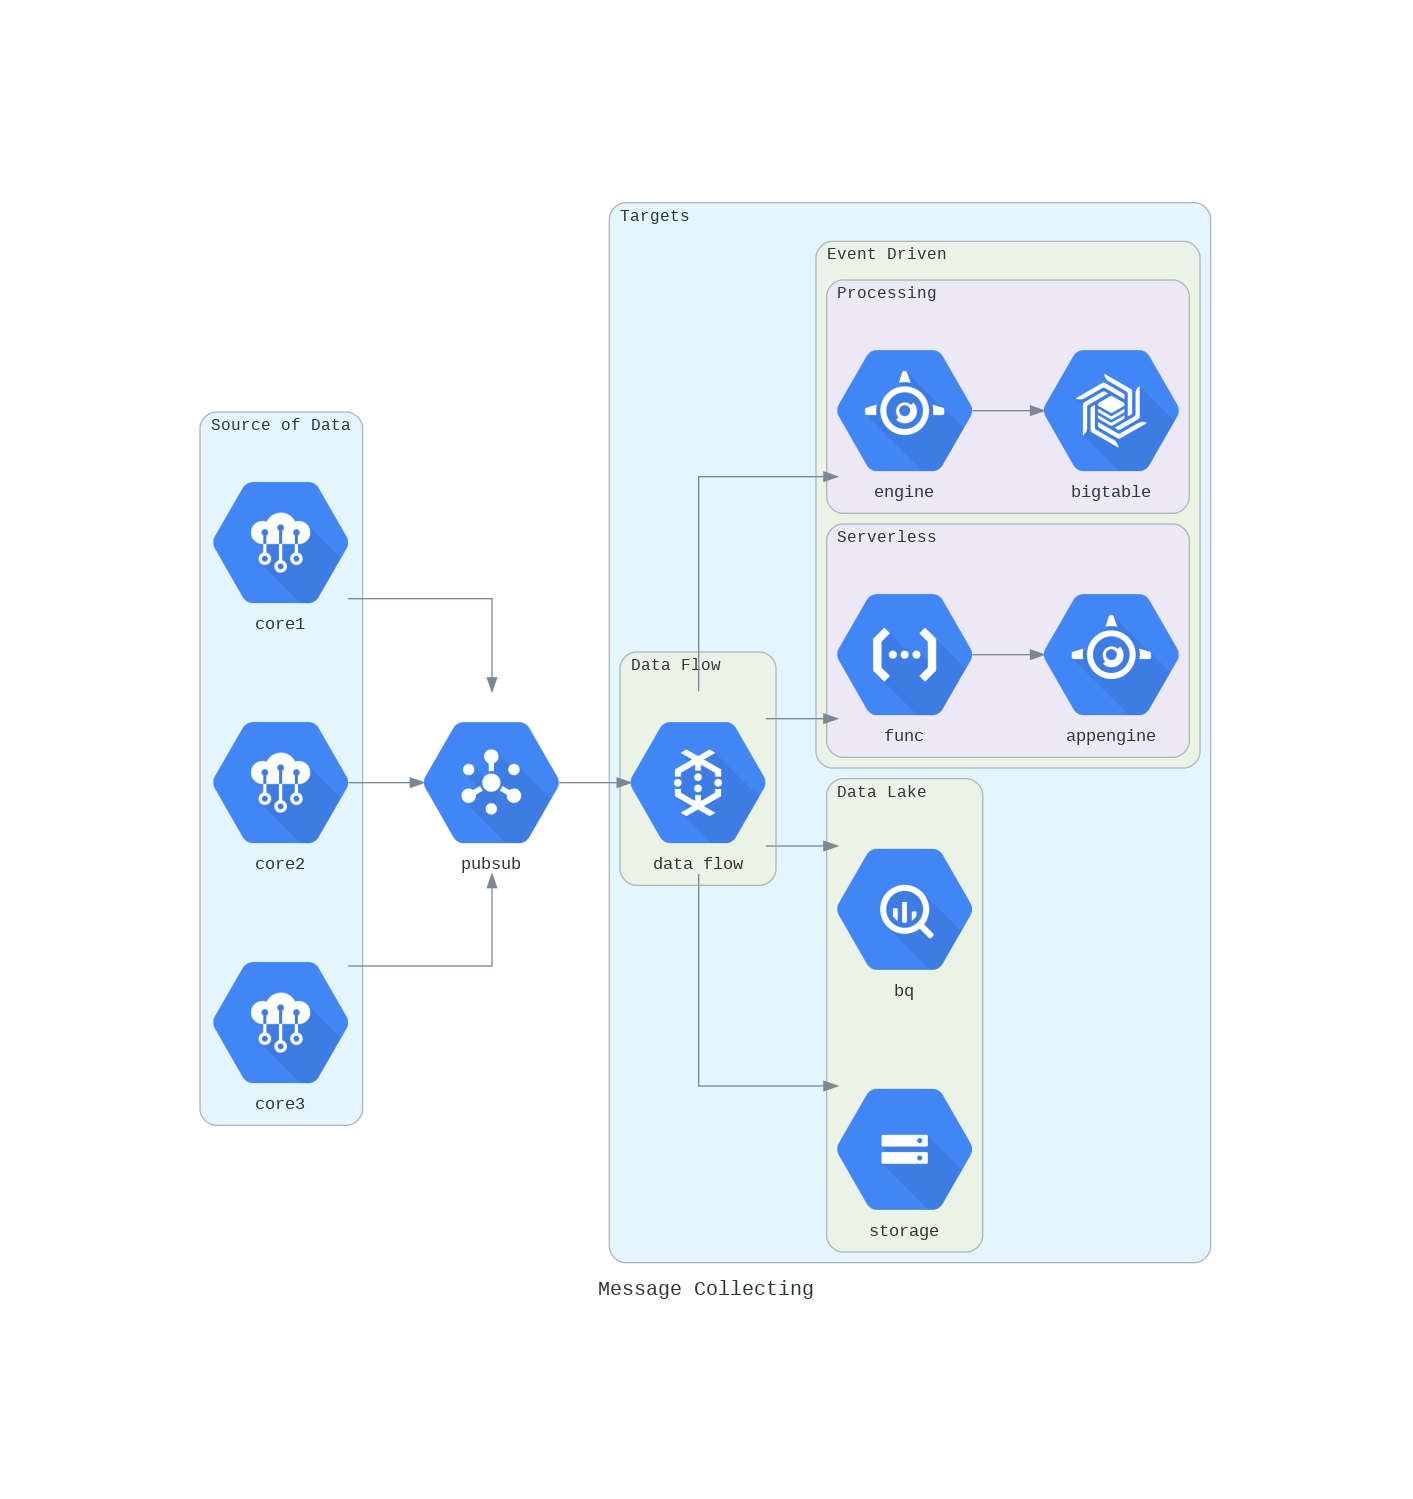

In [9]:
from diagrams import Cluster, Diagram
from diagrams.gcp.analytics import BigQuery, Dataflow, PubSub
from diagrams.gcp.compute import AppEngine, Functions
from diagrams.gcp.database import BigTable
from diagrams.gcp.iot import IotCore
from diagrams.gcp.storage import GCS

with Diagram("Message Collecting", show=False) as msg_arch:
    pubsub = PubSub("pubsub")

    with Cluster("Source of Data"):
        [IotCore("core1"),
         IotCore("core2"),
         IotCore("core3")] >> pubsub

    with Cluster("Targets"):
        with Cluster("Data Flow"):
            flow = Dataflow("data flow")

        with Cluster("Data Lake"):
            flow >> [BigQuery("bq"),
                     GCS("storage")]

        with Cluster("Event Driven"):
            with Cluster("Processing"):
                flow >> AppEngine("engine") >> BigTable("bigtable")

            with Cluster("Serverless"):
                flow >> Functions("func") >> AppEngine("appengine")

    pubsub >> flow

msg_arch

## Advanced Web

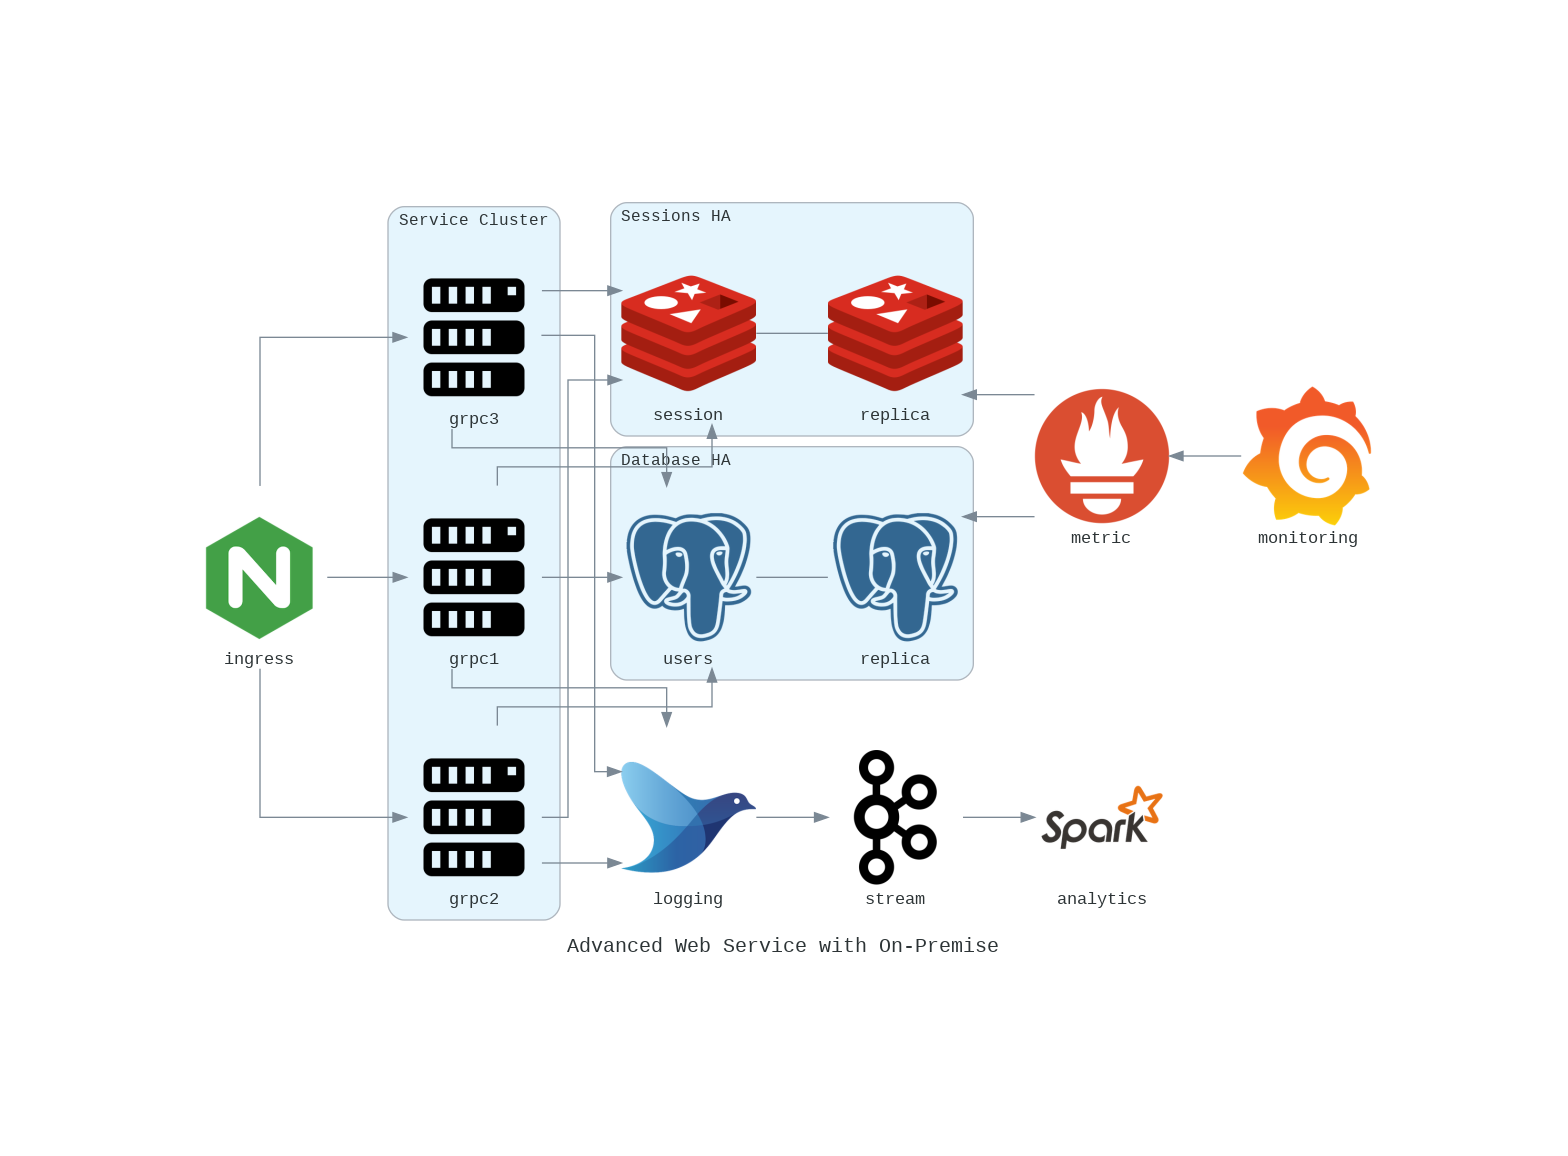

In [10]:
from diagrams import Cluster, Diagram
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka

with Diagram("Advanced Web Service with On-Premise", show=False) as adv_web_service:
    ingress = Nginx("ingress")

    metrics = Prometheus("metric")
    metrics << Grafana("monitoring")

    with Cluster("Service Cluster"):
        grpcsvc = [
            Server("grpc1"),
            Server("grpc2"),
            Server("grpc3")]

    with Cluster("Sessions HA"):
        primary = Redis("session")
        primary - Redis("replica") << metrics
        grpcsvc >> primary

    with Cluster("Database HA"):
        primary = PostgreSQL("users")
        primary - PostgreSQL("replica") << metrics
        grpcsvc >> primary

    aggregator = Fluentd("logging")
    aggregator >> Kafka("stream") >> Spark("analytics")

    ingress >> grpcsvc >> aggregator

adv_web_service